# Prepare your workstation

In [1]:
# Import libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Get multiple outputs in the same cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


# Import the CSV file with Pandas.
data = pd.read_csv('raw_sales.csv', index_col=['datesold'], parse_dates=['datesold'])

# View the DataFrame.
print(data.shape)
data.head()

(29580, 4)


,postcode,price,propertyType,bedrooms
datesold,,,,
2007-02-07,2607,525000,house,4
2007-02-27,2906,290000,house,3
2007-03-07,2905,328000,house,3
2007-03-09,2905,380000,house,4
2007-03-21,2906,310000,house,3


In [2]:
data.isna().sum()

postcode        0
price           0
propertyType    0
bedrooms        0
dtype: int64

In [3]:
# Set the figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the tick style.
sns.set_style('white')

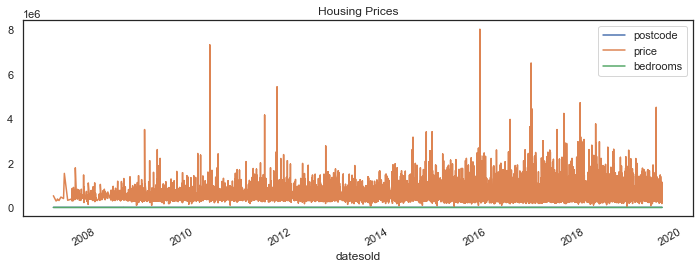

In [4]:
# Plot house prices as time series.
data.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title("Housing Prices")
plt.show(block=False);

3    11933
4    10442
2     3598
5     1950
1     1627
0       30
Name: bedrooms, dtype: int64


Text(0.5, 1.0, 'Count of number of bedrooms')

<AxesSubplot:title={'center':'Count of number of bedrooms'}, xlabel='bedrooms', ylabel='count'>

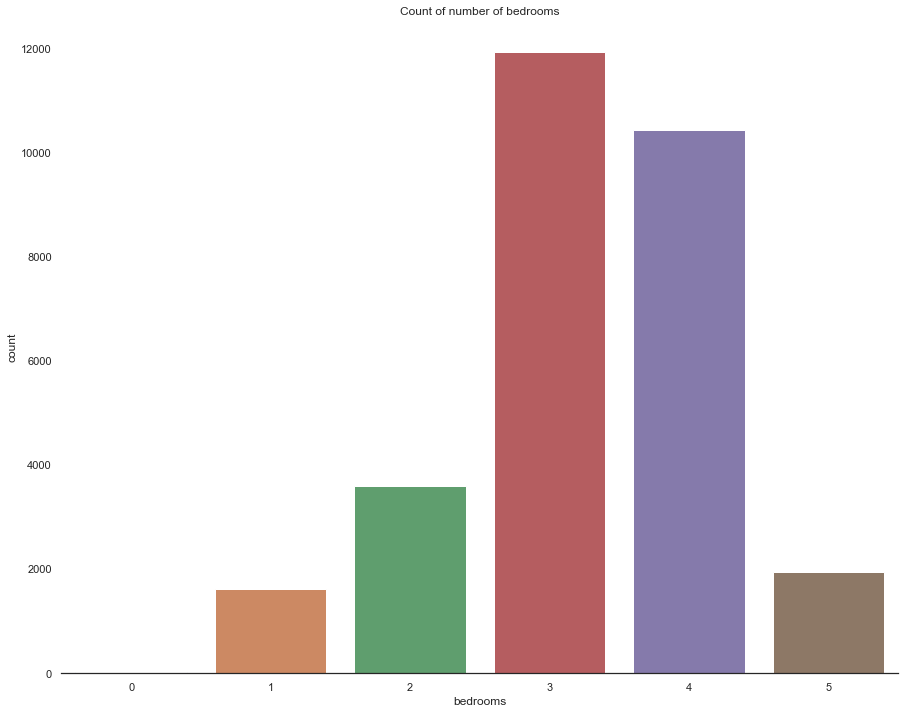

In [5]:
# Count the number of values in a specified column of the DataFrame.
print(data['bedrooms'].value_counts())

# Create a plot.
plt.title("Count of number of bedrooms")

sns.despine(left=True);
sns.countplot(x='bedrooms', data=data)

In [6]:
# Create a copy of the original data for convenience. 
data_sub = data.copy()


# Data set consisting of houses with 1 bedroom: 
df_1 = data_sub[data_sub['bedrooms']==1]
print(df_1.shape)


# Data set consisting of houses with 2 bedrooms: 
df_2 = data_sub[data_sub['bedrooms']==2]
print(df_2.shape)


# Data set consisting of houses with 3 bedrooms: 
df_3 = data_sub[data_sub['bedrooms']==3]
print(df_3.shape)


# Data set consisting of houses with 4 bedrooms: 
df_4 = data_sub[data_sub['bedrooms']==4]
print(df_4.shape)


# Data set consisting of houses with 5 bedrooms: 
df_5 = data_sub[data_sub['bedrooms']==5]
print(df_5.shape)

(1627, 4)
(3598, 4)
(11933, 4)
(10442, 4)
(1950, 4)


(array([613., 982.,  27.,   2.,   1.,   0.,   1.,   0.,   0.,   1.]),
 array([  85000.,  304500.,  524000.,  743500.,  963000., 1182500.,
        1402000., 1621500., 1841000., 2060500., 2280000.]),
 <BarContainer object of 10 artists>)

(array([1.526e+03, 1.846e+03, 1.950e+02, 2.300e+01, 6.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([  96000.,  391400.,  686800.,  982200., 1277600., 1573000.,
        1868400., 2163800., 2459200., 2754600., 3050000.]),
 <BarContainer object of 10 artists>)

(array([1.0209e+04, 1.6280e+03, 8.4000e+01, 8.0000e+00, 1.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  69000.,  710100., 1351200., 1992300., 2633400., 3274500.,
        3915600., 4556700., 5197800., 5838900., 6480000.]),
 <BarContainer object of 10 artists>)

(array([8.528e+03, 1.767e+03, 1.260e+02, 1.600e+01, 1.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  56500.,  850850., 1645200., 2439550., 3233900., 4028250.,
        4822600., 5616950., 6411300., 7205650., 8000000.]),
 <BarContainer object of 10 artists>)

(array([1.289e+03, 5.590e+02, 7.400e+01, 1.700e+01, 7.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([ 210000.,  919000., 1628000., 2337000., 3046000., 3755000.,
        4464000., 5173000., 5882000., 6591000., 7300000.]),
 <BarContainer object of 10 artists>)

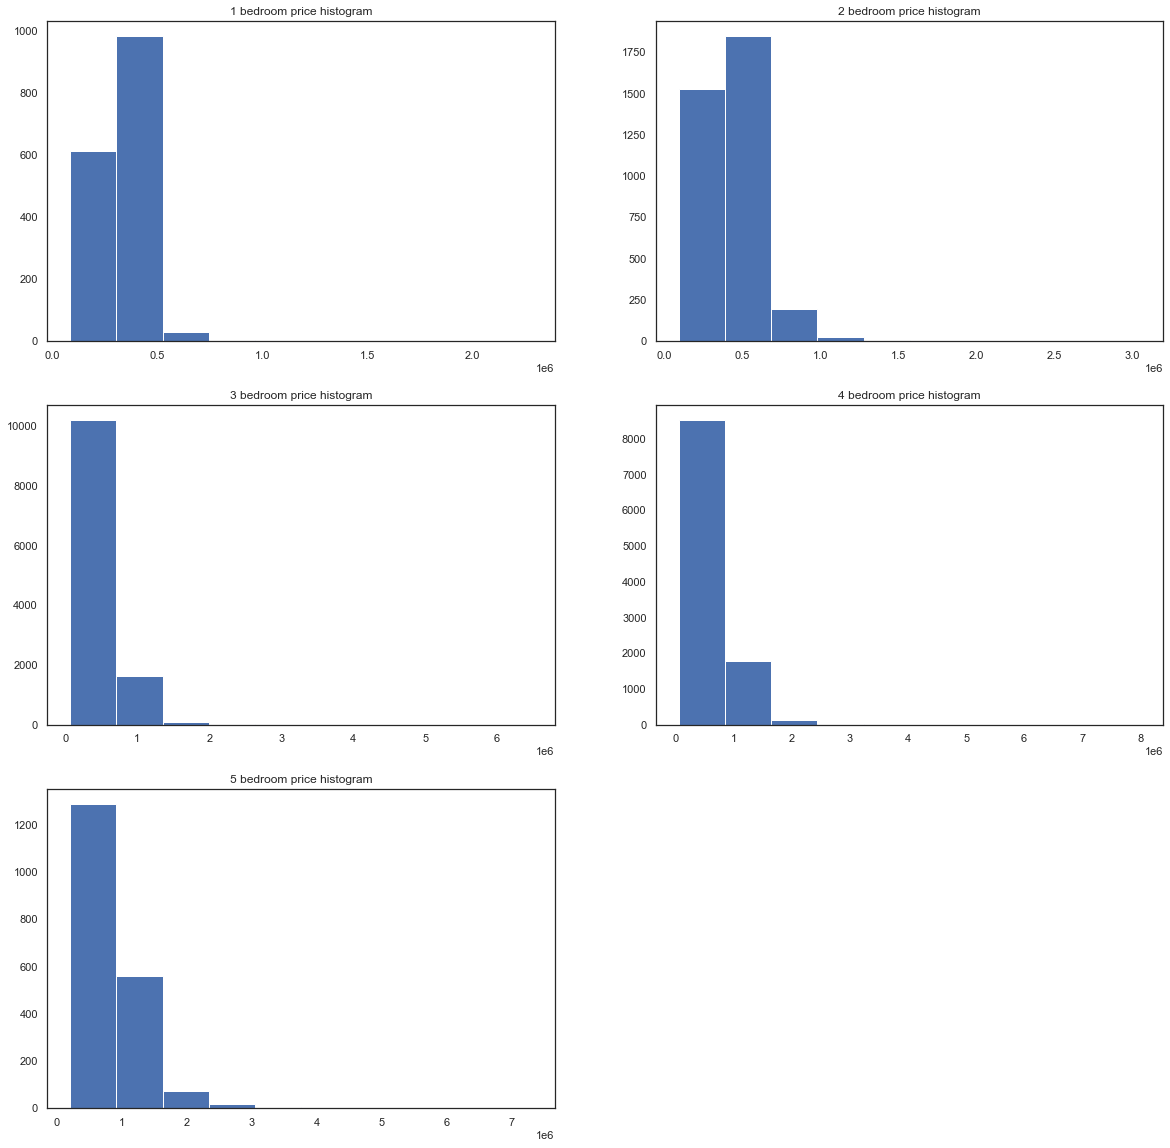

In [7]:
# Set plot size.
fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(20, 20))

# 1 bedroom:
axes[0][0].hist(df_1['price'])
axes[0][0].title.set_text("1 bedroom price histogram")

# 2 bedrooms:
axes[0][1].hist(df_2['price'])
axes[0][1].title.set_text("2 bedroom price histogram")

# 3 bedrooms:
axes[1][0].hist(df_3['price'])
axes[1][0].title.set_text("3 bedroom price histogram")

# 4 bedrooms:
axes[1][1].hist(df_4['price'])
axes[1][1].title.set_text("4 bedroom price histogram")

# 5 bedrooms:
axes[2][0].hist(df_5['price'])
axes[2][0].title.set_text("5 bedroom price histogram")


fig.delaxes(axes[2][1])

plt.show()

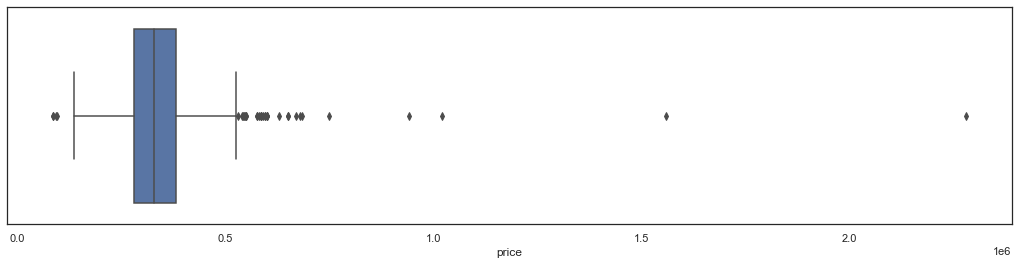

In [14]:
# Create a box plot for 1 bedroom.
# Set figure size.
fig = plt.figure(figsize=(18, 4))

# Create box plot.
ax = sns.boxplot(x=df_1['price'], whis=1.5)

In [12]:
# The columns you want to search for outliers in.
cols = ['price'] 

# Calculate quantiles and IQR.
# Same as np.percentile but maps (0,1) and not (0,100).
Q1 = df_1[cols].quantile(0.25) 
Q3 = df_1[cols].quantile(0.75)
IQR = Q3 - Q1
IQR

# Return a boolean array of the rows with (any) non-outlier column values.
condition = ~((df_1[cols] < (Q1 - 1.5 * IQR)) | (df_1[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter DataFrame based on condition.
df_1_non_outlier = df_1[condition]
df_1_non_outlier.shape

price    100250.0
dtype: float64

(1592, 4)

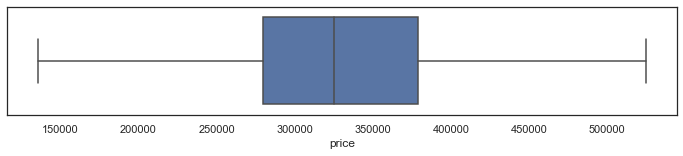

In [20]:
# Plot to see if outliers have been removed: 
# whis = multiplicative factor
fig = plt.subplots(figsize=(12, 2))

ax = sns.boxplot(x=df_1_non_outlier['price'], whis=1.5)

In [33]:
df_1_non_outlier['price'].max()
df_1_non_outlier['price'].min()

525000

135500

<AxesSubplot:xlabel='datesold'>

Text(0.5, 1.0, 'Time series plot for house with 1 bedroom')

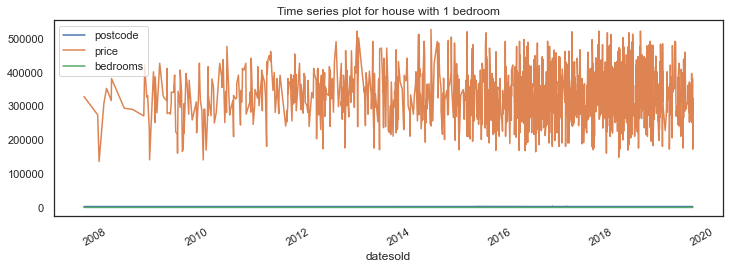

In [34]:
# Plot the time series data.
df_1_non_outlier.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Time series plot for house with 1 bedroom')
plt.show(block=False)

In [35]:
# Resampling data set with 5 bedrooms: 
df_1_res = df_1_non_outlier.resample('M').mean()

# View the DataFrame.
df_1_res.head()

,postcode,price,bedrooms
datesold,,,
2007-07-31,2600.0,327000.0,1.0
2007-08-31,NaN,NaN,NaN
2007-09-30,NaN,NaN,NaN
2007-10-31,2608.5,204250.0,1.0
2007-11-30,2912.0,308000.0,1.0


In [36]:
df_1_res.isna().sum()

postcode    8
price       8
bedrooms    8
dtype: int64

In [37]:
# Dropping the missing values: 
df_1_res.dropna(inplace= True)

df_1_res.isna().sum()

postcode    0
price       0
bedrooms    0
dtype: int64

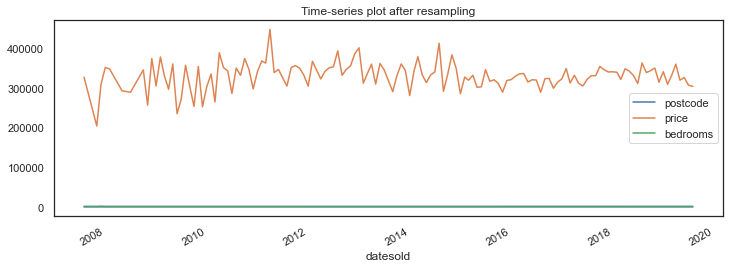

In [38]:
# Plotting the time-series data.
df_1_res.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title("Time-series plot after resampling")
plt.show(block=False);

In [39]:
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(12,4))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, 'g', label='Simple moving average trend')
    
    # Plot confidence intervals for smoothed values.
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
            
    plt.plot(series[window:], label="Actual values")
    plt.legend(loc='best')
    plt.grid(True)


In [51]:
# Calculate SMA for a window size of 5.
df_1_res['SMA_5'] = df_1_res.iloc[:, 1].rolling(window=5).mean()
df_1_res['SMA_30'] = df_1_res.iloc[:, 1].rolling(window=30).mean()
df_1_res['SMA_90'] = df_1_res.iloc[:, 1].rolling(window=90).mean()

# Print the first 15 rows of data.
(df_1_res.head(30))

,postcode,price,bedrooms,SMA_5,SMA_30,SMA_90
datesold,,,,,,
2007-07-31,2600.000000,327000.000000,1.0,NaN,NaN,NaN
2007-10-31,2608.500000,204250.000000,1.0,NaN,NaN,NaN
2007-11-30,2912.000000,308000.000000,1.0,NaN,NaN,NaN
2007-12-31,2612.000000,351000.000000,1.0,NaN,NaN,NaN
2008-01-31,2600.500000,347500.000000,1.0,307550.000000,NaN,NaN
2008-04-30,2600.000000,292500.000000,1.0,300650.000000,NaN,NaN
2008-06-30,2606.000000,289000.000000,1.0,317600.000000,NaN,NaN
2008-09-30,2603.000000,345000.000000,1.0,325000.000000,NaN,NaN
2008-10-31,2608.750000,256625.000000,1.0,306125.000000,NaN,NaN


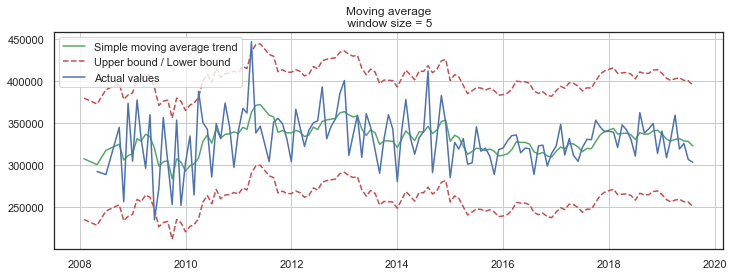

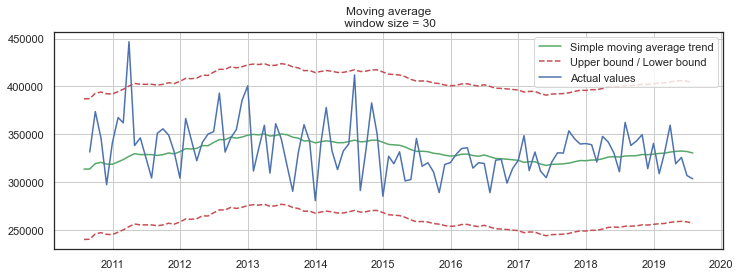

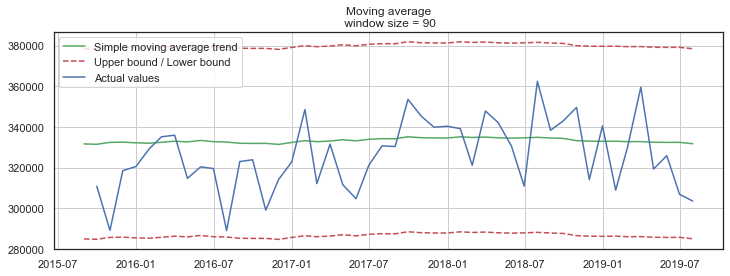

In [53]:
# Smooth by the previous 5 days.
plot_moving_average(df_1_res.price, 5, plot_intervals=True)
# Smooth by the previous 5 days.
plot_moving_average(df_1_res.price, 30, plot_intervals=True)
# Smooth by the previous 5 days.
plot_moving_average(df_1_res.price, 90, plot_intervals=True)

price    140000.0
dtype: float64

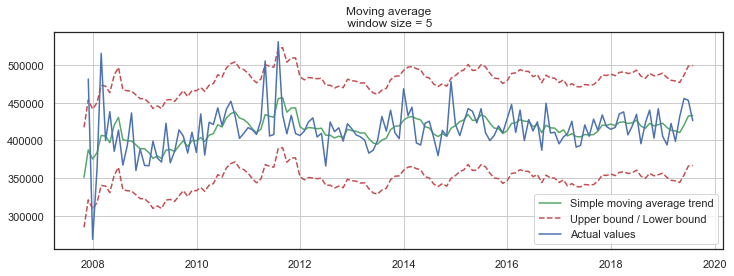

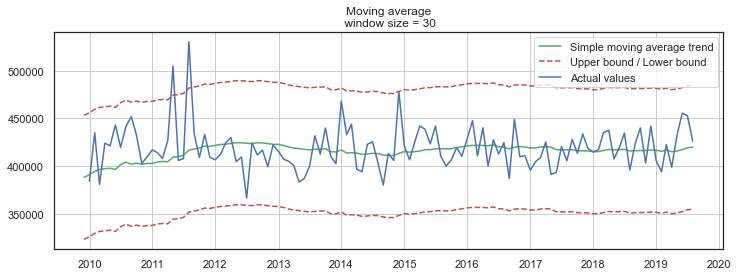

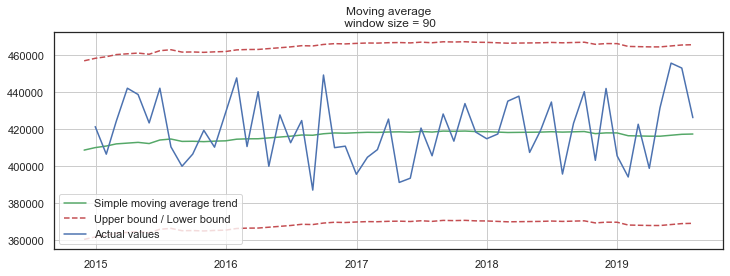

In [45]:
# The columns you want to search for outliers in.
cols = ['price'] 

# Calculate quantiles and IQR.
# Same as np.percentile but maps (0,1) and not (0,100).
Q1 = df_2[cols].quantile(0.25) 
Q3 = df_2[cols].quantile(0.75)
IQR = Q3 - Q1
IQR

# Return a boolean array of the rows with (any) non-outlier column values.
condition = ~((df_2[cols] < (Q1 - 1.5 * IQR)) | (df_2[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter DataFrame based on condition.
df_2_non_outlier = df_2[condition]

# Resampling data set with 5 bedrooms: 
df_2_res = df_2_non_outlier.resample('M').mean()
df_2_res.dropna(inplace= True)
# Smooth by the previous 5 days.
plot_moving_average(df_2_res.price, 5, plot_intervals=True)
# Smooth by the previous 5 days.
plot_moving_average(df_2_res.price, 30, plot_intervals=True)
# Smooth by the previous 5 days.
plot_moving_average(df_2_res.price, 90, plot_intervals=True)

price    177500.0
dtype: float64

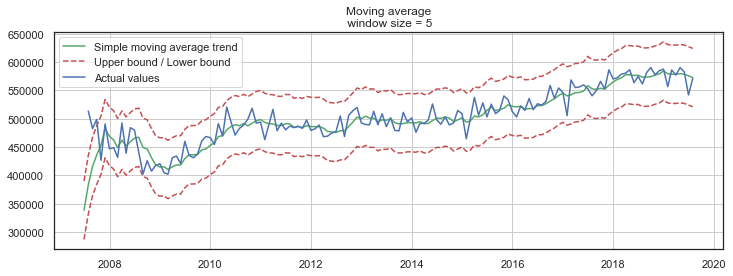

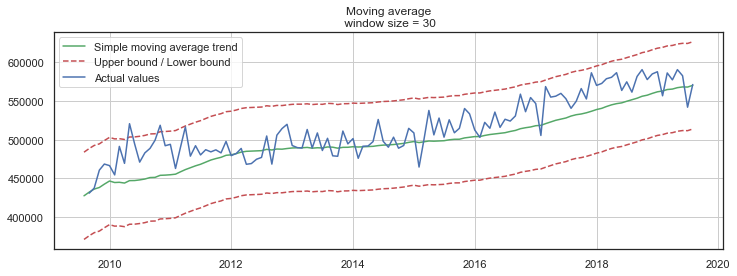

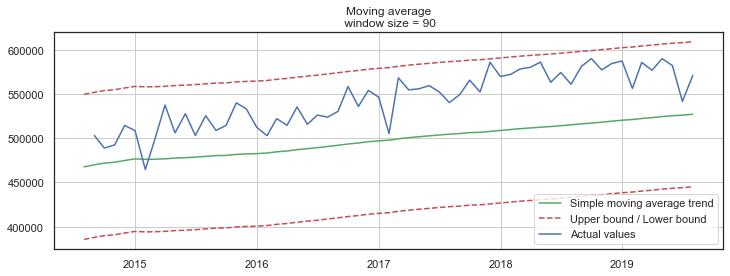

In [46]:
# The columns you want to search for outliers in.
cols = ['price'] 

# Calculate quantiles and IQR.
# Same as np.percentile but maps (0,1) and not (0,100).
Q1 = df_3[cols].quantile(0.25) 
Q3 = df_3[cols].quantile(0.75)
IQR = Q3 - Q1
IQR

# Return a boolean array of the rows with (any) non-outlier column values.
condition = ~((df_3[cols] < (Q1 - 1.5 * IQR)) | (df_3[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter DataFrame based on condition.
df_3_non_outlier = df_3[condition]

# Resampling data set with 5 bedrooms: 
df_3_res = df_3_non_outlier.resample('M').mean()
df_3_res.dropna(inplace= True)
# Smooth by the previous 5 days.
plot_moving_average(df_3_res.price, 5, plot_intervals=True)
# Smooth by the previous 5 days.
plot_moving_average(df_3_res.price, 30, plot_intervals=True)
# Smooth by the previous 5 days.
plot_moving_average(df_3_res.price, 90, plot_intervals=True)


price    230500.0
dtype: float64

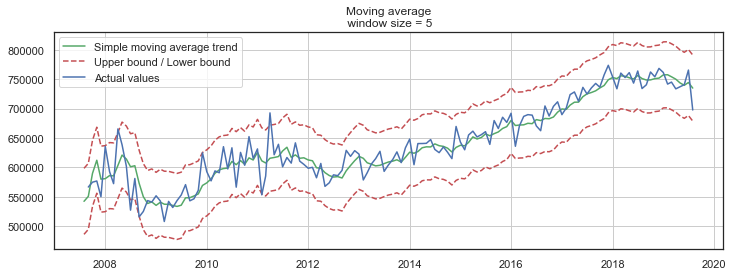

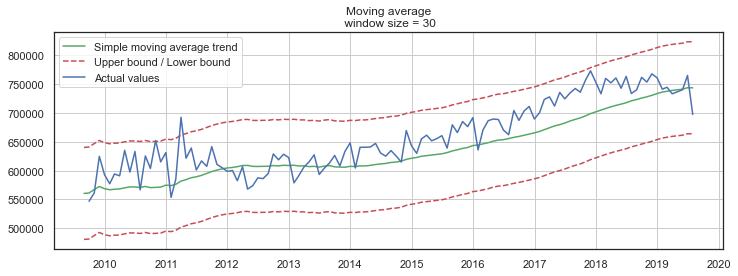

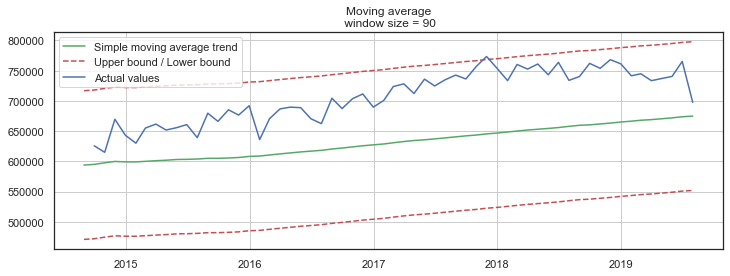

In [47]:
# The columns you want to search for outliers in.
cols = ['price'] 

# Calculate quantiles and IQR.
# Same as np.percentile but maps (0,1) and not (0,100).
Q1 = df_4[cols].quantile(0.25) 
Q3 = df_4[cols].quantile(0.75)
IQR = Q3 - Q1
IQR

# Return a boolean array of the rows with (any) non-outlier column values.
condition = ~((df_4[cols] < (Q1 - 1.5 * IQR)) | (df_4[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter DataFrame based on condition.
df_4_non_outlier = df_4[condition]

# Resampling data set with 5 bedrooms: 
df_4_res = df_4_non_outlier.resample('M').mean()
df_4_res.dropna(inplace= True)
# Smooth by the previous 5 days.
plot_moving_average(df_4_res.price, 5, plot_intervals=True)
# Smooth by the previous 5 days.
plot_moving_average(df_4_res.price, 30, plot_intervals=True)
# Smooth by the previous 5 days.
plot_moving_average(df_4_res.price, 90, plot_intervals=True)

price    325000.0
dtype: float64

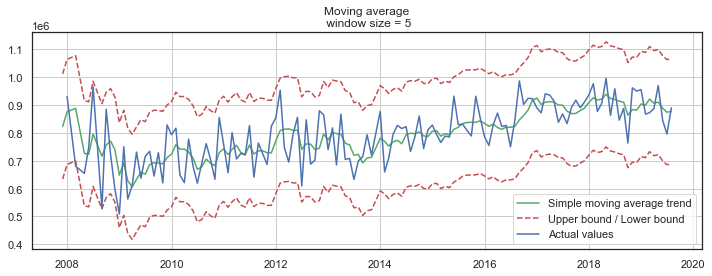

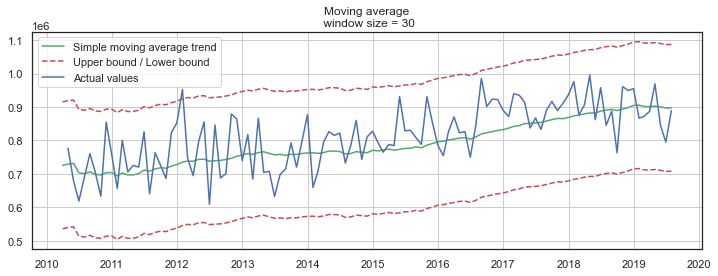

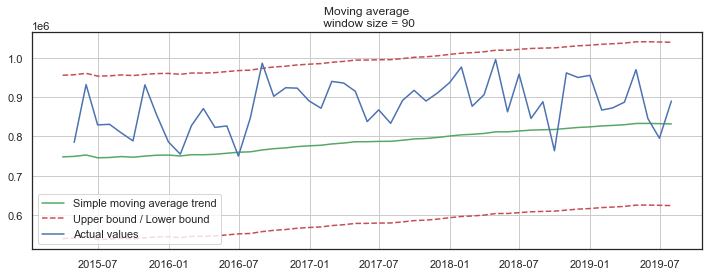

In [48]:
# The columns you want to search for outliers in.
cols = ['price'] 

# Calculate quantiles and IQR.
# Same as np.percentile but maps (0,1) and not (0,100).
Q1 = df_5[cols].quantile(0.25) 
Q3 = df_5[cols].quantile(0.75)
IQR = Q3 - Q1
IQR

# Return a boolean array of the rows with (any) non-outlier column values.
condition = ~((df_5[cols] < (Q1 - 1.5 * IQR)) | (df_5[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter DataFrame based on condition.
df_5_non_outlier = df_5[condition]

# Resampling data set with 5 bedrooms: 
df_5_res = df_5_non_outlier.resample('M').mean()
df_5_res.dropna(inplace= True)
# Smooth by the previous 5 days.
plot_moving_average(df_5_res.price, 5, plot_intervals=True)
# Smooth by the previous 5 days.
plot_moving_average(df_5_res.price, 30, plot_intervals=True)
# Smooth by the previous 5 days.
plot_moving_average(df_5_res.price, 90, plot_intervals=True)

# Write up the conclusions you can draw from this analysis. How would you advise Derek to proceed?
Over time, the 3 bedroom and 4 bedroom house prices have increased the most quickly / have the strongest upward trend, so it would be best to build those. The 5 bedroom houses, even excluding outliers, have a lower minimum value too, so there is potential a 5 bedroom house could sell for less. 

In [54]:
df_1_non_outlier['price'].max()
df_1_non_outlier['price'].min()
df_2_non_outlier['price'].max()
df_2_non_outlier['price'].min()
df_3_non_outlier['price'].max()
df_3_non_outlier['price'].min()
df_4_non_outlier['price'].max()
df_4_non_outlier['price'].min()
df_5_non_outlier['price'].max()
df_5_non_outlier['price'].min()

525000

135500

700000

160000

876000

252500

1135001

235000

1480000

210000

In [56]:
df_1_non_outlier['price'].max() - df_1_non_outlier['price'].min()
df_2_non_outlier['price'].max() - df_2_non_outlier['price'].min()
df_3_non_outlier['price'].max() - df_3_non_outlier['price'].min()
df_4_non_outlier['price'].max() - df_4_non_outlier['price'].min()
df_5_non_outlier['price'].max() - df_5_non_outlier['price'].min()

389500

540000

623500

900001

1270000